In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [2]:
# TODO
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


Text(0.5, 0, 'age')

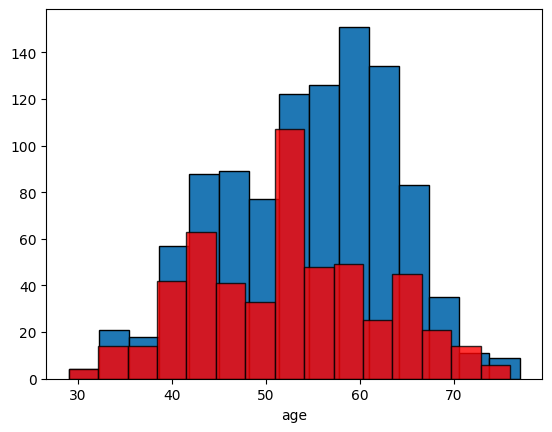

In [3]:
df.dropna(inplace=True)
age_target = df.filter(items=['age','target'])
age_target_1 = age_target[age_target['target'] == 1]
plt.hist(age_target['age'], bins=15, edgecolor='black')
plt.hist(age_target_1['age'], bins=15, edgecolor='black', color='red', alpha=0.8)
plt.xlabel('age')


Text(0.5, 0, 'chol')

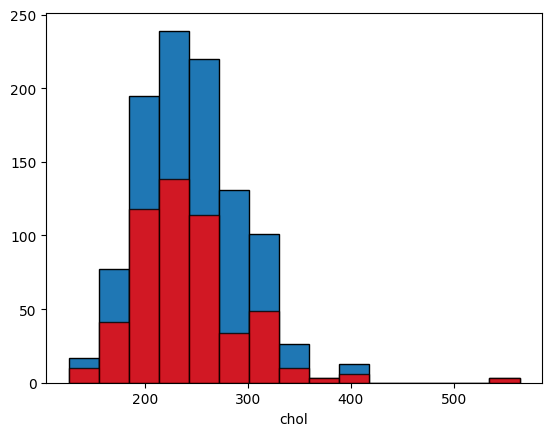

In [4]:
chol_target = df.filter(items=['chol','target'])
chol_target_1 = chol_target[chol_target['target'] == 1]
plt.hist(chol_target['chol'], bins=15, edgecolor='black')
plt.hist(chol_target_1['chol'], bins=15, edgecolor='black', color='red', alpha=0.8)
plt.xlabel('chol')

Text(0.5, 0, 'sex')

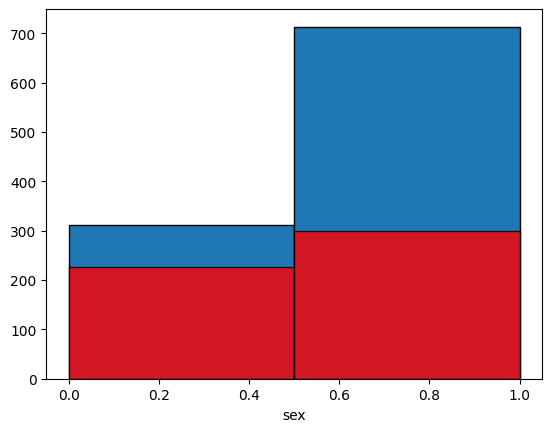

In [5]:
sex_target = df.filter(items=['sex','target'])
sex_target_1 = sex_target[sex_target['target'] == 1]
plt.hist(sex_target['sex'], bins=2, edgecolor='black')
plt.hist(sex_target_1['sex'], bins=2, edgecolor='black', color='red', alpha=0.8)
plt.xlabel('sex')

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [6]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [7]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [8]:
def perceptron_sgd(X, Y):
    n_features = X.shape[1]
    w = np.zeros(n_features)
    epochs = 100
    for epoch in range(epochs):
        for x_i, y_i in zip(X, Y):
            if y_i * np.dot(x_i, w) <= 0:
                w = w + y_i * x_i
    return w


### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron_sgd_plot(X, Y):
    n_features = X.shape[1]
    w = np.zeros(n_features)
    errors = []
    epochs = 200
    for epoch in range(epochs):
        total_loss = 0
        for x_i, y_i in zip(X, Y):
            if y_i * np.dot(x_i, w) <= 0:
                w = w + y_i * x_i
                total_loss += 1
        errors.append(total_loss)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w


In [10]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y[y == 0] = -1

In [11]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

# add a -1 bias term to the end of each row
bias_column = np.ones((X.shape[0], 1)) * -1

# Concatenate the original X with the bias column
X = np.hstack((X, bias_column))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=30)
# Print the shapes of the resulting arrays to verify the split
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (820, 14)
X_val shape: (205, 14)
y_train shape: (820,)
y_val shape: (205,)


[ -6095.   14820.     187.     274.   -9026.    5032.  -14169.   -9838.
    248.    -409.    -354.    1278.  -13406.7    194. ]


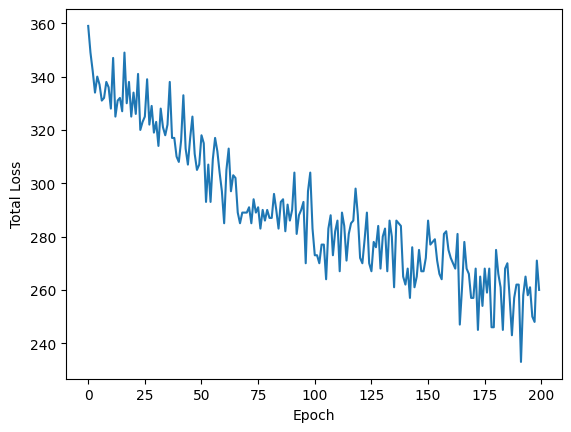

In [13]:
w = perceptron_sgd_plot(X_train,y_train)
print(w)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [14]:
def accuracy_score(y_true, y_pred):
    return len([i for i in range(len(y_true)) if y_true[i] == y_pred[i]]) / len(y_true)

Get the accuracy of your model using the function you implemented.

In [15]:
# TODO
predictions = np.sign(np.dot(X_val, w))
print(accuracy_score(y_val, predictions))

0.7902439024390244


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [16]:
import numpy as np

def confusion_matrix(actual, predicted, labels):
    n_classes = len(labels)
    matrix = np.zeros((n_classes, n_classes))

    for a, p in zip(actual, predicted):
        matrix[labels.index(a), labels.index(p)] += 1

    return matrix


Implement the following function to plot the confusion matrix obtained from the previous part.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(matrix, labels):
    fig, ax = plt.subplots()
    cax = ax.matshow(matrix, cmap='Blues')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, str(matrix[i, j]), ha='center', va='center')
    plt.show()


Now plot the confusion matrix for your model:

C:\Users\Erfan\AppData\Local\Temp\ipykernel_20048\1311168607.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Erfan\AppData\Local\Temp\ipykernel_20048\1311168607.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


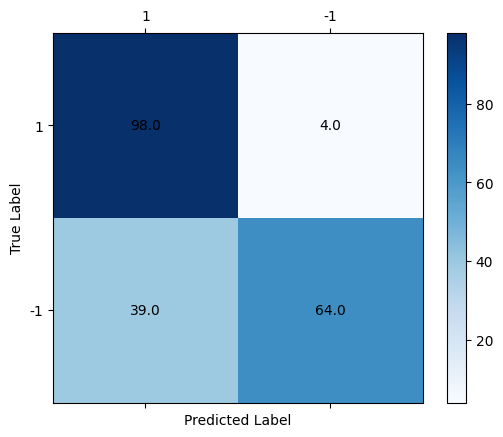

In [18]:
my_confusion_matrix = confusion_matrix(y_val, predictions, [1, -1])
plot_confusion_matrix(my_confusion_matrix, [1, -1])

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [19]:
def recall_score(cm):
    recall_scores = np.zeros(2, dtype=np.float64)
    for i in range(2):
        true_positives = cm[i, i]
        false_negatives = np.sum(cm[i, :]) - true_positives
        recall_scores[i] = true_positives / (true_positives + false_negatives) if true_positives + false_negatives != 0 else 0
    return recall_scores

print(recall_score(my_confusion_matrix))

[0.96078431 0.62135922]


In [20]:
def precision_score(cm):
    precision_scores = np.zeros(2, dtype=np.float64)
    for i in range(2):
        true_positives = cm[i, i]
        false_positives = np.sum(cm[:, i]) - true_positives
        precision_scores[i] = true_positives / (true_positives + false_positives) if true_positives + false_positives != 0 else 0
    return precision_scores

print(precision_score(my_confusion_matrix))

[0.71532847 0.94117647]


In [21]:
def f1_score(cm):
    f1_scores = 2 * (precision_score(cm) * recall_score(cm)) / (precision_score(cm) + recall_score(cm))
    return f1_scores

print(f1_score(my_confusion_matrix))

[0.82008368 0.74853801]


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [22]:
class GaussianNaiveBayes:
    def __init__(self):
        self.class_prior_ = None
        self.class_means_ = None
        self.class_variances_ = None

    def fit(self, X, y):
        self.class_prior_ = {}
        for label in np.unique(y):
            self.class_prior_[label] = np.sum(y == label) / len(y)
        
        self.class_means_ = {}
        self.class_variances_ = {}
        for label in np.unique(y):
            X_class = X[y == label]
            self.class_means_[label] = np.mean(X_class, axis=0)
            self.class_variances_[label] = np.var(X_class, axis=0)

    def _calculate_likelihood(self, x, mean, variance):
        exponent = -((x - mean) ** 2) / (2 * variance)
        return np.exp(exponent) / np.sqrt(2 * np.pi * variance)

    def _calculate_posterior(self, X):
        posteriors = {}
        for label in self.class_prior_:
            class_prior = self.class_prior_[label]
            class_mean = self.class_means_[label]
            class_variance = self.class_variances_[label]
            likelihoods = np.apply_along_axis(self._calculate_likelihood, 1, X, class_mean, class_variance)
            likelihoods_product = np.prod(likelihoods, axis=1)
            posteriors[label] = likelihoods_product * class_prior
        return posteriors

    def predict_proba(self, X):
        posteriors = self._calculate_posterior(X)
        
        sum_probs = np.sum(list(posteriors.values()), axis=0)
        for label in posteriors:
            posteriors[label] /= sum_probs
            posteriors[label] = np.log(posteriors[label])
        
        return posteriors


class MultinomialNaiveBayes:
    def __init__(self, alpha=1):
        self.alpha = alpha
        self.class_prior_ = None
        self.feature_prob_ = None

    def fit(self, X, y):
        self.class_prior_ = {}
        for label in np.unique(y):
            self.class_prior_[label] = np.sum(y == label) / len(y)
        
        self.feature_prob_ = {}
        for label in np.unique(y):
            self.feature_prob_[label] = {}
            X_class = X[y == label]
            class_total_count = np.sum(X_class)
            for feature in range(X_class.shape[1]):
                self.feature_prob_[label][feature] = {}
                for feature_val in np.unique(X_class[:, feature]):
                    self.feature_prob_[label][feature][feature_val] = np.sum(X_class[:, feature] == feature_val) / class_total_count

    def predict_proba(self, X):
        preds = {}
        for c in self.class_prior_:
            preds[c] = []
            for sample in X:
                likelihood = 0
                for feature in range(len(sample)):
                    if sample[feature] not in self.feature_prob_[c][feature]:
                        self.feature_prob_[c][feature][sample[feature]] = 1
                    likelihood += np.log(self.feature_prob_[c][feature][sample[feature]])
                preds[c].append(likelihood)
        return preds

class MixedDataNB:
    def __init__(self):
        self.multinomial_nb = MultinomialNaiveBayes()
        self.gaussian_nb = GaussianNaiveBayes()

    def fit(self, X_discrete, X_continuous, y):
        self.multinomial_nb.fit(X_discrete, y)
        self.gaussian_nb.fit(X_continuous, y)

    def predict(self, X_discrete, X_continuous):
        multinomial_posterior = self.multinomial_nb.predict_proba(X_discrete)
        gaussian_posterior = self.gaussian_nb.predict_proba(X_continuous)
        comb_posterior = {}
        for c in self.multinomial_nb.class_prior_:
            comb_posterior[c] = multinomial_posterior[c] + gaussian_posterior[c]
        preds = []
        for sample in range(len(comb_posterior[0])):
            if comb_posterior[0][sample] > comb_posterior[1][sample]:
                preds.append(0)
            else:
                preds.append(1)
        return preds

## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [23]:
df = pd.read_csv("heart.csv")
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df.loc[:, "target"].to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=30)
NB = MixedDataNB()

### Model training

In [24]:
NB.fit(X_train[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy(), X_train[cont_feature].to_numpy(), y_train)

### Make predictions

In [25]:
predictions = NB.predict(X_val[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy(), X_val[cont_feature].to_numpy())

### Accuracy

Get the accuracy of your model using the function you implemented.

In [26]:
print(accuracy_score(y_val, predictions))

0.8634146341463415


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

In [27]:
my_cm = confusion_matrix(y_val, predictions, [0, 1])

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [28]:
print(recall_score(my_cm))

[0.7961165  0.93137255]


In [29]:
print(precision_score(my_cm))

[0.92134831 0.81896552]


In [30]:
print(f1_score(my_cm))

[0.85416667 0.87155963]


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


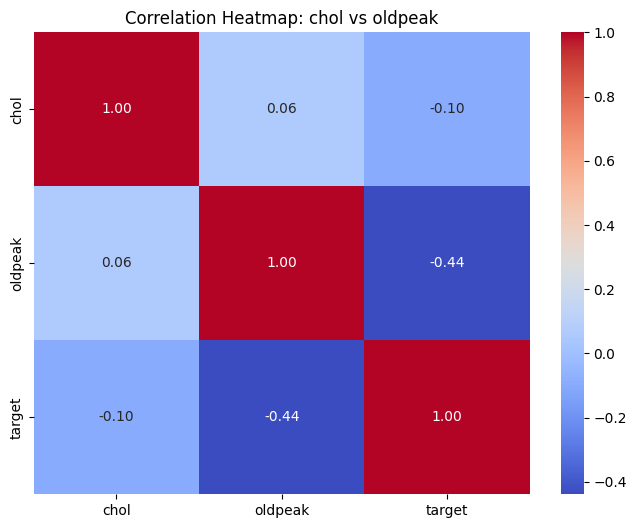

In [31]:
correlation_matrix = df[['chol', 'oldpeak', 'target']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: chol vs oldpeak")
plt.show()

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [32]:
NB.fit(X_train[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy(), X_train[['age', 'trestbps', 'thalach', 'oldpeak']].to_numpy(), y_train)
prediction_without_chol = NB.predict(X_val[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy(), X_val[['age', 'trestbps', 'thalach', 'oldpeak']].to_numpy())
print(accuracy_score(y_val, prediction_without_chol))


0.8585365853658536


Remove oldpeak and test model

In [33]:
NB.fit(X_train[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy(), X_train[['age', 'trestbps', 'thalach', 'chol']].to_numpy(), y_train)
prediction_without_chol = NB.predict(X_val[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy(), X_val[['age', 'trestbps', 'thalach', 'chol']].to_numpy())
print(accuracy_score(y_val, prediction_without_chol))

0.8536585365853658


Comparison

**Answer:** accuracy slightly decreases when we remove oldpeak compared to chol. Which is as expected, considering heatmap plot that shows target and oldpeak have more correlation than target and chol

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer:

# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [34]:
df = pd.read_csv("Imbalanced_Datasets/1.csv")

### Find the distribution


Find the number of samples from each target label.

In [35]:
class_number = {}
for label in np.unique(df["target"]):
    class_number[label] = np.sum(df["target"] == label)
print(class_number)

{0: 499, 1: 226}


### Split data

In [36]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df.loc[:, "target"].to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)

### Train model and make predictions

In [37]:
NB.fit(X_train[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy(), X_train[cont_feature].to_numpy(), y_train)
predictions = NB.predict(X_val[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy(), X_val[cont_feature].to_numpy())

### Plot confusion matrix

C:\Users\Erfan\AppData\Local\Temp\ipykernel_20048\1311168607.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Erfan\AppData\Local\Temp\ipykernel_20048\1311168607.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


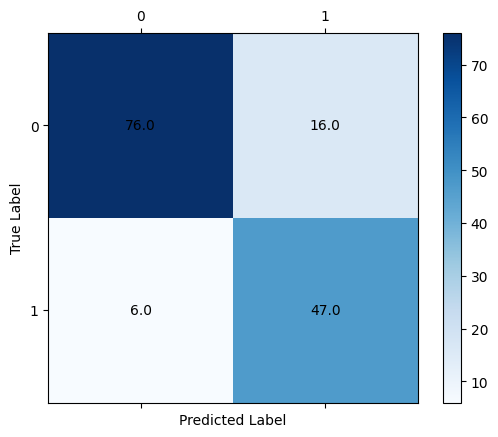

In [38]:
my_cm = confusion_matrix(y_val, predictions, [0, 1])
plot_confusion_matrix(my_cm, [0, 1])

### Calculate metrics

In [39]:
print("accuracy_score =", accuracy_score(y_val, predictions))
print("f1_score =", f1_score(my_cm))
print("recall_score =", recall_score(my_cm))
print("precision_score =", precision_score(my_cm))

accuracy_score = 0.8482758620689655
f1_score = [0.87356322 0.81034483]
recall_score = [0.82608696 0.88679245]
precision_score = [0.92682927 0.74603175]


## Second dataset

### Load data

In [40]:
df = pd.read_csv("Imbalanced_Datasets/2.csv")

### Find the distribution


Find the number of samples from each target label.

In [41]:
class_number = {}
for label in np.unique(df["target"]):
    class_number[label] = np.sum(df["target"] == label)
print(class_number)

{0: 499, 1: 126}


### Split data

In [42]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df.loc[:, "target"].to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=20)

### Train model and make predictions

In [43]:
NB.fit(X_train[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy(), X_train[cont_feature].to_numpy(), y_train)
predictions = NB.predict(X_val[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy(), X_val[cont_feature].to_numpy())

### Plot confusion matrix

C:\Users\Erfan\AppData\Local\Temp\ipykernel_20048\1311168607.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Erfan\AppData\Local\Temp\ipykernel_20048\1311168607.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


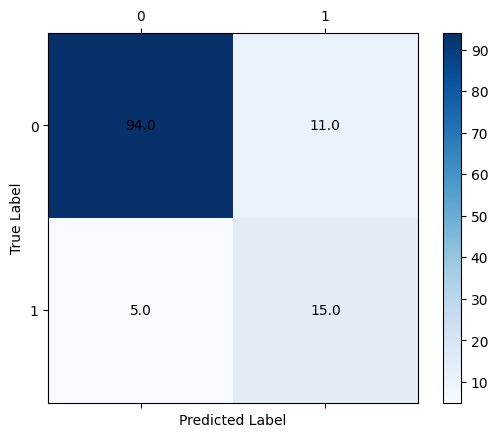

In [44]:
my_cm = confusion_matrix(y_val, predictions, [0, 1])
plot_confusion_matrix(my_cm, [0, 1])

### Calculate metrics

In [45]:
print("accuracy_score =", accuracy_score(y_val, predictions))
print("f1_score =", f1_score(my_cm))
print("recall_score =", recall_score(my_cm))
print("precision_score =", precision_score(my_cm))

accuracy_score = 0.872
f1_score = [0.92156863 0.65217391]
recall_score = [0.8952381 0.75     ]
precision_score = [0.94949495 0.57692308]


## Third dataset

### Load data

In [46]:
df = pd.read_csv("Imbalanced_Datasets/3.csv")

### Find the distribution


Find the number of samples from each target label.

In [47]:
class_number = {}
for label in np.unique(df["target"]):
    class_number[label] = np.sum(df["target"] == label)
print(class_number)

{0: 499, 1: 26}


### Split data

In [48]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df.loc[:, "target"].to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=30)

### Train model and make predictions

In [49]:
NB.fit(X_train[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy(), X_train[cont_feature].to_numpy(), y_train)
predictions = NB.predict(X_val[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy(), X_val[cont_feature].to_numpy())

### Plot confusion matrix

C:\Users\Erfan\AppData\Local\Temp\ipykernel_20048\1311168607.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Erfan\AppData\Local\Temp\ipykernel_20048\1311168607.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


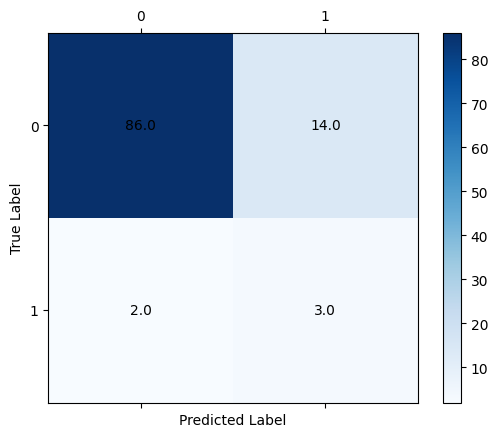

In [50]:
my_cm = confusion_matrix(y_val, predictions, [0, 1])
plot_confusion_matrix(my_cm, [0, 1])

### Calculate metrics

In [51]:
print("accuracy_score =", accuracy_score(y_val, predictions))
print("f1_score =", f1_score(my_cm))
print("recall_score =", recall_score(my_cm))
print("precision_score =", precision_score(my_cm))

accuracy_score = 0.8476190476190476
f1_score = [0.91489362 0.27272727]
recall_score = [0.86 0.6 ]
precision_score = [0.97727273 0.17647059]


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

**Answer:** accuracy may not provide a comprehensive evaluation of model performance in imbalanced datasets. Metrics such as F1 score, precision, and recall offer a more nuanced understanding of how well the model performs across both classes, making them more suitable for evaluating imbalanced datasets.